## IHP SG13G2 process - i-v Curves

### Disable auto-scrolling

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Simulation

In [2]:
%%writefile .spiceinit
set ngbehavior=hs
set ng_nomodcheck
set color0=white
set color1=black
set xbrushwidth=2
set altshow

Overwriting .spiceinit


In [2]:
%%writefile ihp_netlist_iv.spice
* ivCurves_ihp 
*

** spice model 
.lib ~/share/pdks/ihp-sg13g2/libs.tech/ngspice/models/cornerMOSlv.lib mos_tt

** options
.options nomod delmax=5p relv=1e-6 relmos=1e-6 method=gear

** parameters
.global gnd
.param gs=1 ds=1

** temperature
.TEMP 27

** transistor geometrical dimensions
.param L1 = 0.13u
.param width = 5u

** netlist
Vdsn dn gnd 'ds'
Vgsn gn gnd 'gs'
Vsdp gnd dp 'ds'
Vsgp gnd gp 'gs'

xmn dn gn gnd gnd sg13_lv_nmos L='L1' W='width' ng=1 m=1
xmp dp gp gnd gnd sg13_lv_pmos L='L1' W='width' ng=1 m=1

.op

.control
pre_osdi ./psp103_nqs.osdi
save v(dn) v(gn) @n.xmn.nsg13_lv_nmos[ids]
dc vdsn 0 1.8 0.01 vgsn 0.2 1.8 0.2
let id_n=@n.xmn.nsg13_lv_nmos[ids]
write ./spiceout/iv_nmos_ihp.raw id_n v(dn) v(gn)

save v(dp) v(gp) @n.xmp.nsg13_lv_pmos[ids]
dc vsdp 0 1.8 0.01 vsgp 0.2 1.8 0.2
let id_p=@n.xmp.nsg13_lv_pmos[ids]
write ./spiceout/iv_pmos_ihp.raw id_p v(dp) v(gp)
.endc

.end

Overwriting ihp_netlist_iv.spice


In [4]:
!ngspice -b ihp_netlist_iv.spice


Note: Compatibility modes selected: hs


Circuit: * ivcurves_ihp 

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using SPARSE 1.3 as Direct Linear Solver
 Reference value :  6.30000e-01
No. of Data Rows : 1629
binary raw file "./spiceout/iv_nmos_ihp.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using SPARSE 1.3 as Direct Linear Solver
 Reference value :  9.40000e-01
No. of Data Rows : 1629
binary raw file "./spiceout/iv_pmos_ihp.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using SPARSE 1.3 as Direct Linear Solver

No. of Data Rows : 1
	Node                                  Voltage
	----                                  -------
	----	-------
	n.xmn.nsg13_lv_nmos#implicit_equation_6   0.000000e+00
	n.xmn.nsg13_lv_nmos#flow(SPLINE7)   0.000000e+00
	n.xmn.nsg13_lv_nmos#flow(RES7)   0.000000e+00
	n.xmn.nsg13_lv_nmos#implicit_equation_5   0.000000e+00
	n.xmn.nsg13_lv_nmos#flow(SPLINE6)   0.000000e+00
	n.xmn.nsg13_lv_nmos#flow(RES6)   0.000000e+00


    ibe                = -1.81557e-13
    ids                = 0.000595295
    idb                = 1.81557e-13
    isb                = 0
    igs                = 1.87616e-11
    igd                = 6.8071e-12
    igb                = 1.18977e-21
    idedge             = 0
    igcs               = 9.76207e-12
    igcd               = 6.8071e-12
    iavl               = 7.99988e-14
    igisl              = 0
    igidl              = 2.22211e-125
    ijs                = 0
    ijsbot             = 0
    ijsgat             = 0
    ijssti             = 0
    ijd                = -1.01558e-13
    ijdbot             = -2.47944e-17
    ijdgat             = -1.01455e-13
    ijdsti             = -7.83663e-17
    vds                = 1
    vgs                = 1
    vsb                = -0
    vto                = 0.433052
    vts                = 0.433049
    vth                = 0.400516
    vgt                = 0.599484
    vdss               = 0.484863
    vsat               = 0.515137
   

### Read and process the simulation data

Reading file with encoding  utf_8
File contains 4 traces, reading 4
Binary RAW file with Normal access
['v(v-sweep)', 'i(id_n)', 'v(dn)', 'v(gn)']


OrderedDict([('Filename', PosixPath('spiceout/iv_nmos_ihp.raw')), (' * ivcurves_ihp ', ''), ('Date', 'Thu Dec 14 10:26:49  2023'), ('Plotname', 'DC transfer characteristic'), ('Flags', 'real'), ('No. Variables', 4), ('No. Points', 1629), ('Variables', ['v(v-sweep)', 'i(id_n)', 'v(dn)', 'v(gn)'])])


number of sweeps in the simulation: 1


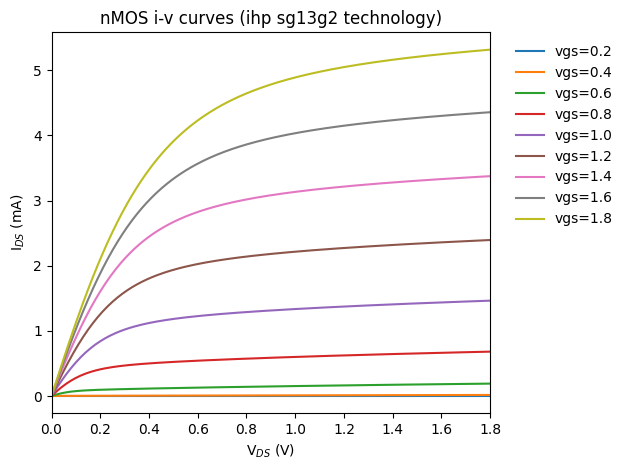

Reading file with encoding  utf_8
File contains 4 traces, reading 4
Binary RAW file with Normal access
['v(v-sweep)', 'i(id_p)', 'v(dp)', 'v(gp)']


OrderedDict([('Filename', PosixPath('spiceout/iv_pmos_ihp.raw')), (' * ivcurves_ihp ', ''), ('Date', 'Thu Dec 14 10:26:49  2023'), ('Plotname', 'DC transfer characteristic'), ('Flags', 'real'), ('No. Variables', 4), ('No. Points', 1629), ('Variables', ['v(v-sweep)', 'i(id_p)', 'v(dp)', 'v(gp)'])])


number of sweeps in the simulation: 1


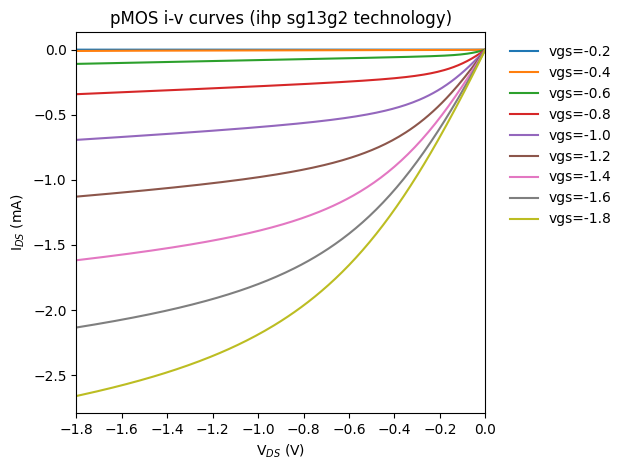

In [5]:
# PyPlot_iv_ihp.py
import sys
import matplotlib.pyplot as plt
from PyLTSpice import RawRead

# read simulation output (nmos)
LTR = RawRead("./spiceout/iv_nmos_ihp.raw") 

print(LTR.get_trace_names())
print("\n")
print(LTR.get_raw_property())
print("\n")
steps = LTR.get_steps()
num_steps = len(steps) 
print('number of sweeps in the simulation:', num_steps)

# objects containing the data
vdn = LTR.get_trace('v(dn)')
vgn = LTR.get_trace('v(gn)')
idn = LTR.get_trace('i(id_n)')

#extract the data from the object
if num_steps == 1:
    VD_N = vdn.get_wave(0)
    VG_N = vgn.get_wave(0)
    ID_N  = idn.get_wave(0)
    
vd_veclen = len(VD_N)
vg_veclen = len(VG_N)
id_veclen = len(ID_N)

m = int((1.8-0)/0.01 + 1)  # number of vd sweeping points in spice simulation
n = int((1.8-0.2)/0.2 + 1) # number of vg sweeping points in spice simulation
k = m*n

if vd_veclen != vg_veclen or vg_veclen != id_veclen:
  print("DATA VECTORS ARE NOT of THE SAME LENGTH!")
  sys.exit(0)
  
if k != vd_veclen:
  print("THE NUMBER OF DATA POINTS IS INCONSISTENT!")
  sys.exit(0)


fig1 = plt.figure()
for i in range(n):
    vds = VD_N[0+m*i:m+m*i]
    ids = ID_N[0+m*i:m+m*i]
    plt.plot(vds,1e3*ids, label = 'vgs=%.1f' %VG_N[m*i])
    
plt.xlim(0,1.8)
plt.xlabel('V$_{DS}$ (V)')
plt.ylabel('I$_{DS}$ (mA)')
plt.title('nMOS i-v curves (ihp sg13g2 technology)')
plt.legend(loc="best",frameon=False,
           bbox_to_anchor=(1.03, 1.0))
plt.tight_layout()
plt.show()


# read simulation output (pmos)
LT = RawRead("./spiceout/iv_pmos_ihp.raw")
 
print(LT.get_trace_names())
print("\n")
print(LT.get_raw_property())
print("\n")
steps = LT.get_steps()
num_steps = len(steps) 
print('number of sweeps in the simulation:', num_steps)

# objects containing the data
vdp = LT.get_trace('v(dp)')
vgp = LT.get_trace('v(gp)')
idp = LT.get_trace('i(id_p)')

#extract the data from the object
if num_steps == 1:
    VD_P = vdp.get_wave(0)
    VG_P = vgp.get_wave(0)
    ID_P  = idp.get_wave(0)
    
# The simulation sweeps done for the nmos and pmos are the same 
# no need to recompute the data structure    
    
fig2 = plt.figure()
for i in range(n):
    vds = VD_P[0+m*i:m+m*i]
    ids = -ID_P[0+m*i:m+m*i] # must flip sign
    plt.plot(vds,1e3*ids, label = 'vgs=%.1f' %VG_P[m*i])
    
    
plt.xlim(-1.8,0)
plt.xlabel('V$_{DS}$ (V)')
plt.ylabel('I$_{DS}$ (mA)')
plt.title('pMOS i-v curves (ihp sg13g2 technology)')
plt.legend(loc="best",frameon=False,
               bbox_to_anchor=(1.03, 1.0))
plt.tight_layout()
plt.show()
